In [1]:
#Imported Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
import matplotlib.patches as mpatches
import time

#Classifier Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

#Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report
from collections import Counter
from sklearn.model_selection import KFold,StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
24300,33164.0,-1.638330,-1.997785,1.236241,-2.483885,0.182321,-1.645626,-0.729813,-0.114861,0.399473,...,-0.264309,0.101959,-0.095502,0.479006,-0.817397,-0.255343,0.393821,0.067546,128.98,0
252626,155894.0,-1.009366,0.669148,0.177688,-1.505202,1.838969,-0.552705,0.878524,0.063006,-0.398941,...,-0.280438,-0.950417,-0.255939,0.110033,0.016933,-0.002032,-0.082225,0.107885,0.89,0
185816,126830.0,-0.707102,1.210094,-0.897276,-0.221754,0.284509,-1.409547,1.044550,-0.282188,0.786989,...,0.172203,0.848431,-0.030314,-0.070494,-0.261897,-0.146378,0.320567,0.401204,46.40,0
15567,26961.0,1.485676,-1.342185,0.438560,-1.592312,-1.585594,-0.058832,-1.496196,0.172657,-1.484299,...,-0.078787,0.023773,-0.102463,-0.561440,0.344827,-0.063775,0.030824,0.006589,26.00,0
89696,62688.0,-1.191632,1.009339,1.632469,-0.429066,0.451856,-0.764323,1.031558,-0.412291,-0.165414,...,-0.184117,-0.411794,0.117857,0.356785,-0.334900,-0.125451,-0.568310,-0.137019,9.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum().max()

np.int64(0)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
print(f'No Frauds: {round(df['Class'].value_counts()[0]/len(df)*100,2)}%')
print(f'Frauds: {round(df['Class'].value_counts()[1]/len(df)*100,2)}%')

No Frauds: 99.83%
Frauds: 0.17%


Our dataset is really imbalanced. Majority of the transactions are non fraudulent. if we use this data to train our model it will overfit since it will assume that most transactions are not fraud. 

Text(0.5, 1.0, 'Class Distribution \n (0: No Fraud || 1: Fraud)')

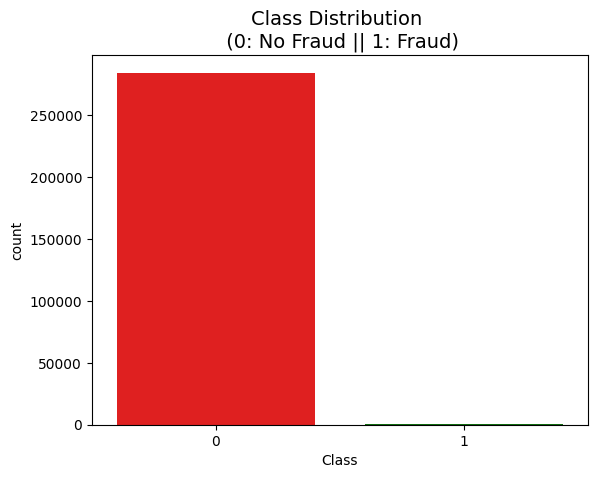

In [7]:
colors = ['red','green']

sns.countplot(x='Class',data=df,palette=colors)
plt.title("Class Distribution \n (0: No Fraud || 1: Fraud)",fontsize=14)

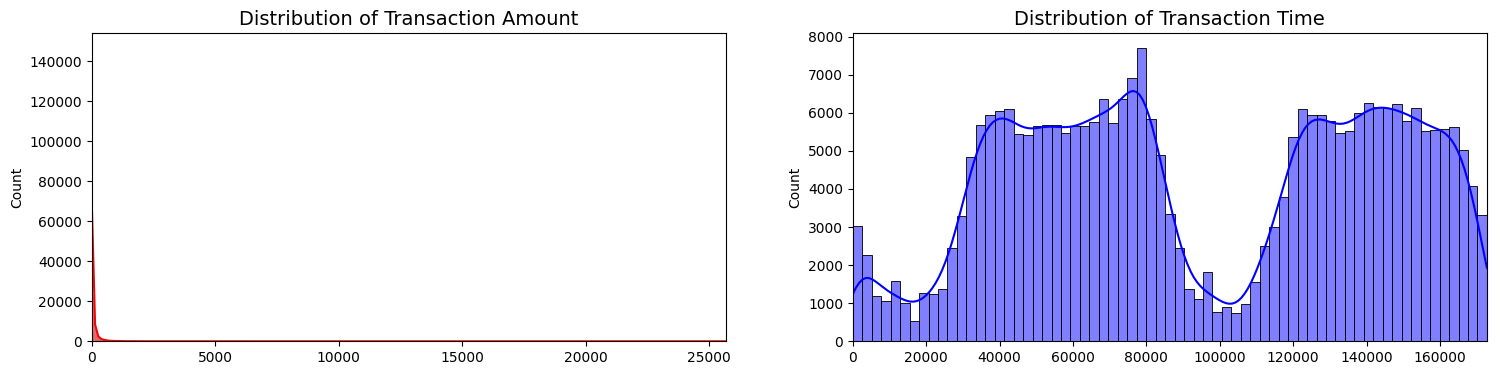

In [8]:
fig ,ax = plt.subplots(1,2,figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val,kde=True,ax=ax[0],color='r')
ax[0].set_title("Distribution of Transaction Amount",fontsize=14)
ax[0].set_xlim([min(amount_val),max(amount_val)])

sns.histplot(time_val,kde=True,ax=ax[1],color='b')
ax[1].set_title("Distribution of Transaction Time",fontsize=14)
ax[1].set_xlim([min(time_val),max(time_val)])

plt.show()


We first need to scale the Amount and Time column(rest are scaled as given in the description of the dataset)

Then we need to create a sub sample of th non fraudulent class otherwise by having imbalance dataframe we wont be able to see the true correlations between the class and features.

In [9]:
#performing scaling on Amount and Time
scaler = RobustScaler()

In [10]:
scaled_amount = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)

df.sample(5)

,scaled_amount,scaled_time,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
165569,-0.296793,0.385590,117513.0,-2.684037,2.525181,-1.575237,-0.539490,2.056998,0.012729,0.661069,...,2.995988,-1.068798,-0.096946,-0.008922,1.153462,0.811072,-1.126726,0.001378,0.76,0
64425,0.950045,-0.394166,51141.0,-2.364603,2.001908,-2.143657,0.947376,-0.739681,-0.815373,-0.059584,...,0.145422,0.387364,-0.143760,-0.391178,-0.364102,-0.356377,0.370711,0.011621,89.99,0
136634,-0.043038,-0.033964,81801.0,-1.878579,2.293848,1.528095,2.774373,-0.386251,1.740169,-1.674066,...,1.134876,0.360824,0.265796,-0.119175,-0.265338,0.310335,-0.064042,0.095110,18.92,0
126878,-0.010620,-0.077057,78133.0,-0.828408,0.526571,-0.156255,-1.709440,-0.154841,-0.703388,0.227271,...,-0.209645,-0.653609,0.377398,-0.337429,-0.497529,-0.265994,-0.386603,-0.116284,21.24,0
266739,0.765598,0.913756,162470.0,1.772054,-0.557616,-0.478249,1.212389,-0.503065,0.178811,-0.604533,...,-0.153029,-0.690609,0.394455,0.547766,-0.537972,-1.028878,0.015753,-0.022323,76.79,0


In [11]:
#seperating the features
X = df.drop('Class',axis=1)
Y = df['Class']

In [12]:
#splitting the data in 5 folds
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

for train_index ,test_index in skf.split(X,Y):
    print("Train:",train_index,"\nTest:",test_index,"\n")

    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    Y_train,Y_test = Y.iloc[train_index],Y.iloc[test_index]


Train: [     0      1      2 ... 284804 284805 284806] 
Test: [     5      7      9 ... 284778 284793 284799] 

Train: [     0      3      4 ... 284804 284805 284806] 
Test: [     1      2     13 ... 284792 284797 284801] 

Train: [     1      2      5 ... 284800 284801 284803] 
Test: [     0      3      4 ... 284804 284805 284806] 

Train: [     0      1      2 ... 284804 284805 284806] 
Test: [    14     19     27 ... 284795 284796 284800] 

Train: [     0      1      2 ... 284804 284805 284806] 
Test: [    11     15     22 ... 284791 284794 284803] 



In [13]:
#applying random sampling
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df,non_fraud_df])

new_df = normal_distributed_df.sample(frac=1,random_state=42)

print(new_df.shape)
new_df.sample(5)

(984, 33)


,scaled_amount,scaled_time,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
50211,-0.293440,-0.473443,44393.0,-4.617461,3.663395,-5.297446,3.880960,-3.263551,-0.918547,-5.715262,...,2.698175,-0.027081,0.366775,-0.123011,-0.300457,-0.239996,-0.183463,-0.073360,1.00,1
28703,-0.307413,-0.582361,35122.0,-2.986913,-1.729481,1.462930,0.058451,2.598183,-1.625841,-0.656707,...,0.003147,0.063371,-0.396353,0.096452,0.593877,0.470855,-0.385091,0.607248,0.00,0
149791,-0.294837,0.085234,91947.0,0.213972,2.117359,-0.614764,4.677398,2.054754,1.858012,0.456237,...,-0.515144,-0.741542,0.185735,-1.869033,-0.936728,0.080220,0.138759,-0.117110,0.90,0
101509,4.164047,-0.197782,67857.0,-1.739334,-1.304655,0.314103,0.053740,-0.058696,0.071260,0.694862,...,-0.665172,-0.632078,-0.421176,-0.400774,-0.001640,-0.495162,0.031633,0.066280,320.00,1
110915,-0.215748,-0.148827,72024.0,-0.607600,0.612075,0.913086,-1.290759,2.317505,3.724554,0.008517,...,-0.184203,-0.453346,-0.267300,1.005282,0.268607,0.250838,0.113834,-0.093274,6.56,0


In [14]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

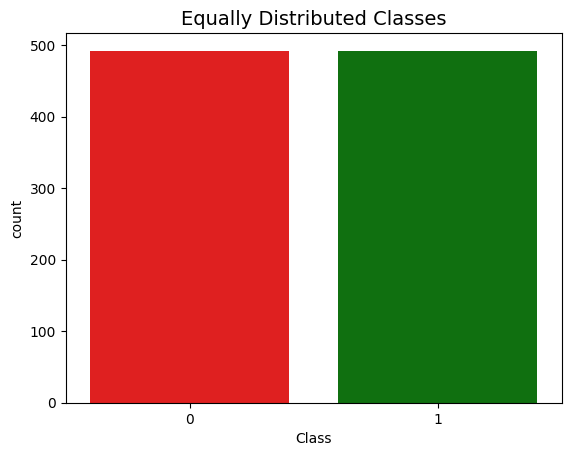

In [15]:
sns.countplot(x='Class',data=new_df,palette=colors)
plt.title("Equally Distributed Classes",fontsize=14)
plt.show()

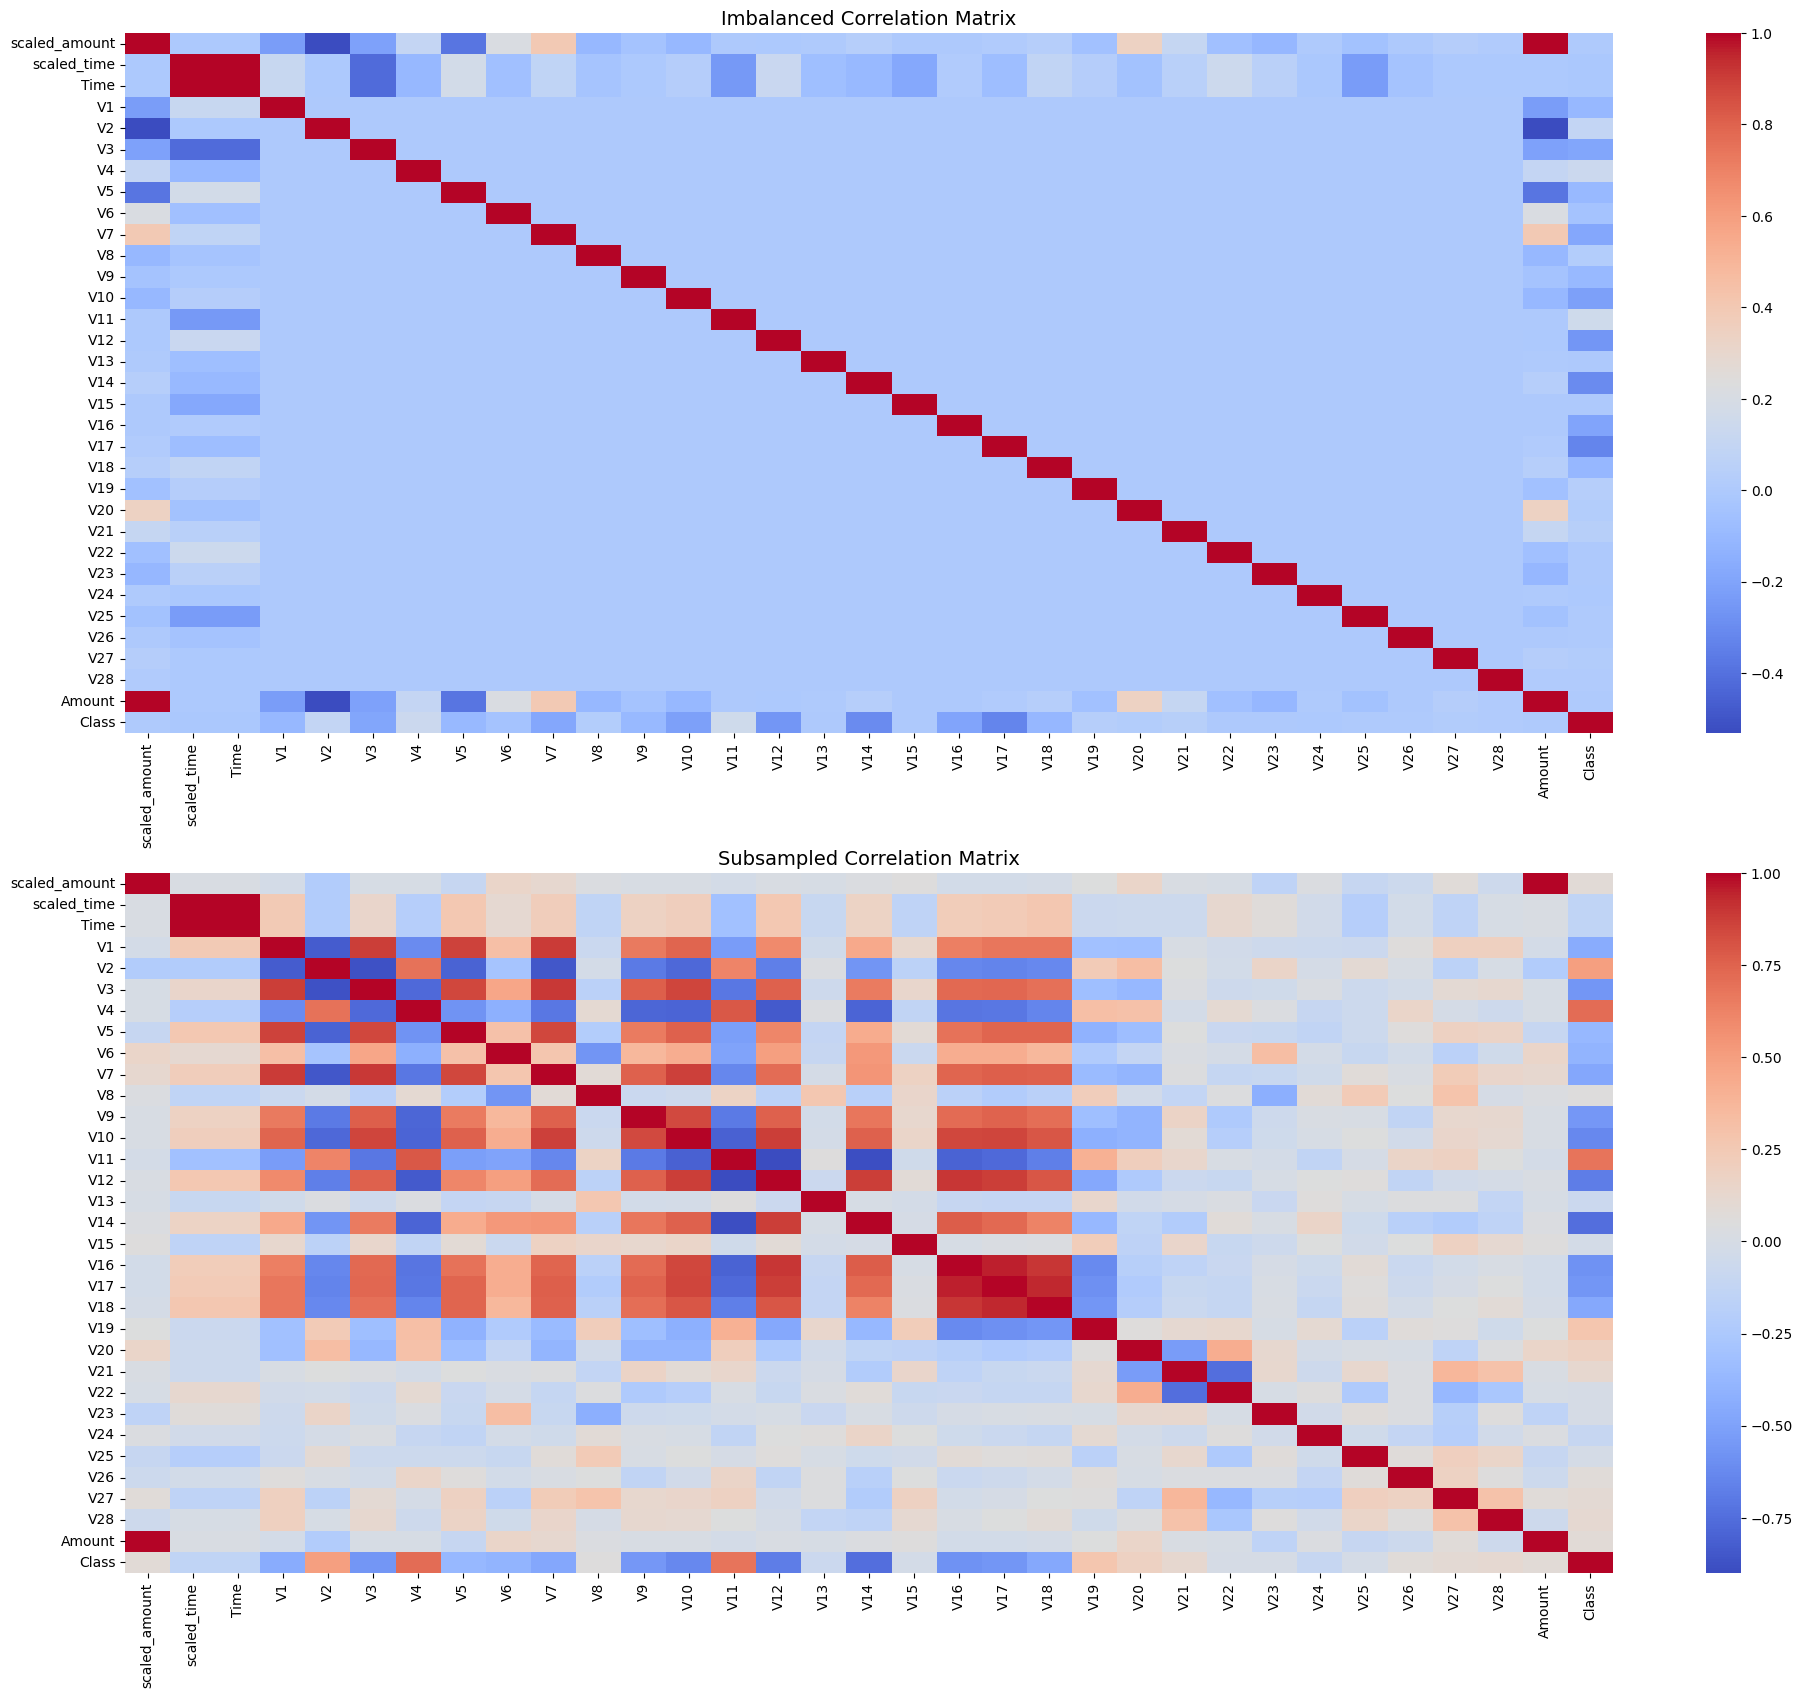

In [16]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(24,20))

#Entire dataframe
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',annot_kws={'size':20},ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix",fontsize=14)

#Subsampled dataframe
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm',annot_kws={'size':20},ax=ax2)
ax2.set_title("Subsampled Correlation Matrix",fontsize=14)

plt.show()

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

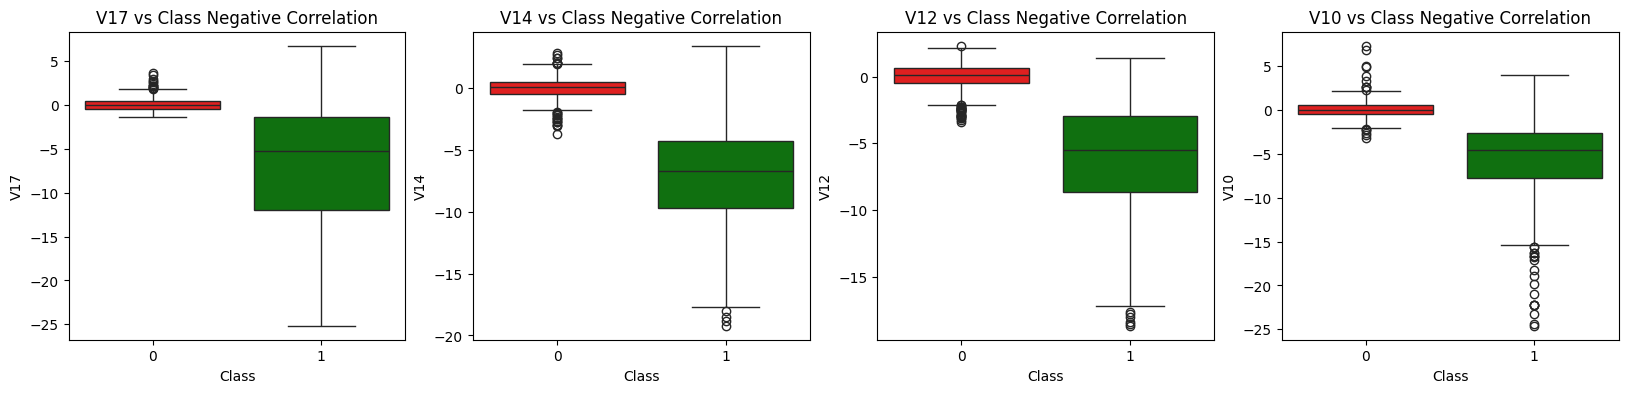

In [17]:
#Negative Correlations with our class
fig,axes = plt.subplots(ncols=4,figsize=(20,4))

sns.boxplot(x='Class',y='V17',data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V14',data=new_df,palette=colors,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,palette=colors,ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,palette=colors,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

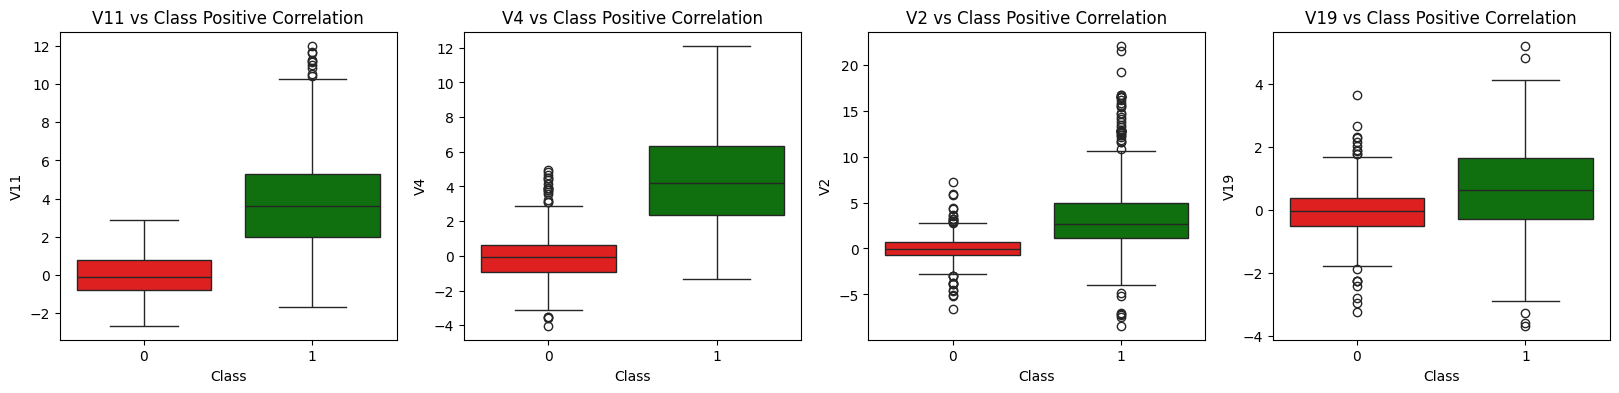

In [18]:
#Positive Correlations with our class
fig,axes = plt.subplots(ncols=4,figsize=(20,4))

sns.boxplot(x='Class',y='V11',data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V4',data=new_df,palette=colors,ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V2',data=new_df,palette=colors,ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x='Class',y='V19',data=new_df,palette=colors,ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

Now we will remove the extreme outliers from the features that have a high correlation with our classes. this will have a positive impact on the accuracy of our models

In [19]:
features = ['V2','V4','V10','V11','V12','V14','V17','V19']
df[features].skew()

V2    -4.624866
V4     0.676292
V10    1.187141
V11    0.356506
V12   -2.278401
V14   -1.995176
V17   -3.844914
V19    0.109192
dtype: float64

we will use IQR method to create a threshold beyound which we will remove the outliers. we know we determine the threshold by multiplying a number by IQR.

The lower the threshold the more outliers it will remove however we want to focus more on "extreme outliers" because we might loose information which will cause our models to have lower accuracy. 

now lets use norm from scipy.stats which tried to fit a Gaussian(bell curve) to our data and plot it on top of the histogram. 

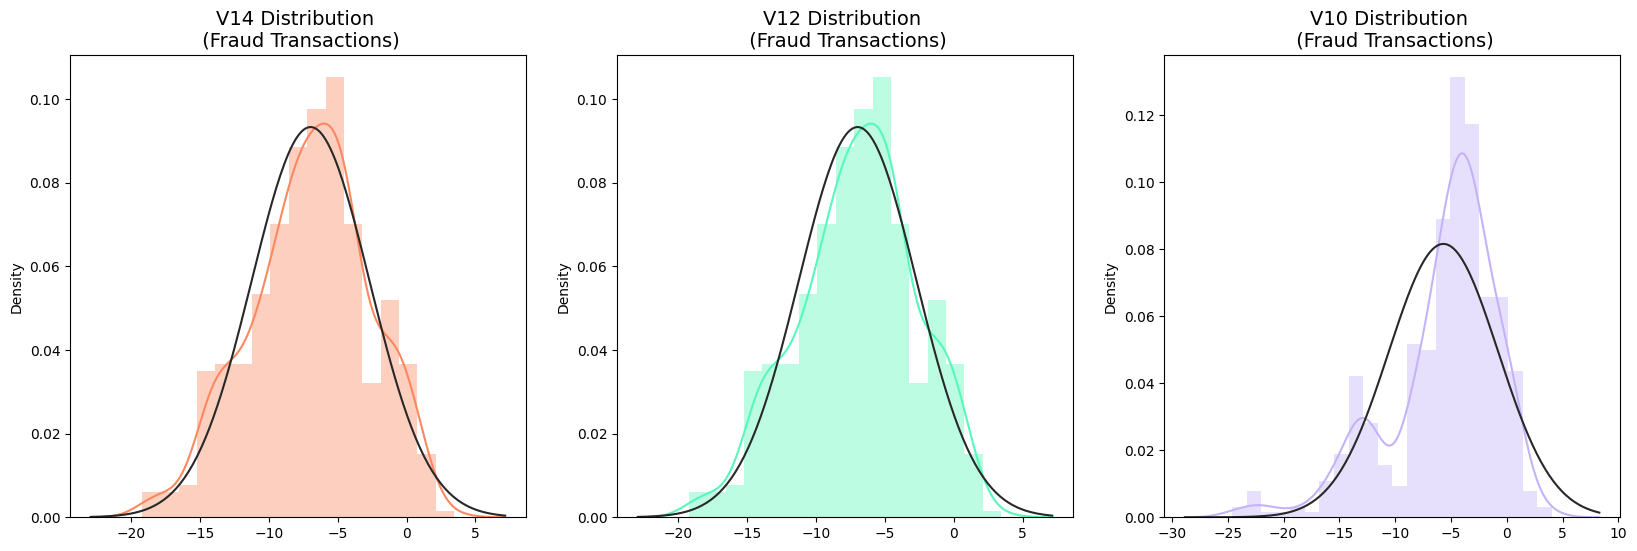

In [20]:
from scipy.stats import norm

fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))

v14_fruad_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fruad_dist,ax=ax1,fit=norm,color='#FB8861')
ax1.set_title("V14 Distribution \n (Fraud Transactions)",fontsize=14)

v12_fruad_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fruad_dist,ax=ax2,fit=norm,color='#56F9BB')
ax2.set_title("V12 Distribution \n (Fraud Transactions)",fontsize=14)

v10_fruad_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fruad_dist,ax=ax3,fit=norm,color='#C5B3F9')
ax3.set_title("V10 Distribution \n (Fraud Transactions)",fontsize=14)

plt.show()

In [21]:
#removing outliers from V14
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values

q25_v14 = np.percentile(v14_fraud,25) 
q75_v14 = np.percentile(v14_fraud,75) 
IQR_v14 = q75_v14 - q25_v14

print("Feature V14 Outliers Removal\n")
print(f"Quartile 25:{q25_v14} \nQuartile 75:{q75_v14}")
print("IQR: ",IQR_v14)

lower_limit_v14 = q25_v14 - (1.5*IQR_v14)
upper_limit_v14 = q75_v14 + (1.5*IQR_v14)
print("\nLower Limit: ",lower_limit_v14)
print("Upper Limit: ",upper_limit_v14)

outliers_v14 = [x for x in v14_fraud if x<lower_limit_v14 or x>upper_limit_v14]
print("\nFeatures V14 Outliers for Fraud Cases: ",outliers_v14)

new_df = new_df.drop(new_df[(new_df['V14'] > upper_limit_v14) | (new_df['V14'] < lower_limit_v14)].index)
print("\nNumber of Instances after outliers removal: ",len(new_df))

Feature V14 Outliers Removal

Quartile 25:-9.692722964972386 
Quartile 75:-4.282820849486865
IQR:  5.409902115485521

Lower Limit:  -17.807576138200666
Upper Limit:  3.8320323237414167

Features V14 Outliers for Fraud Cases:  [np.float64(-18.4937733551053), np.float64(-19.2143254902614), np.float64(-18.0499976898594), np.float64(-18.8220867423816)]

Number of Instances after outliers removal:  980


In [22]:
#Removing outliers from V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values

q25_v12 = np.percentile(v12_fraud,25)
q75_v12 = np.percentile(v12_fraud,75)
IQR_v12 = q75_v12 - q25_v12

print("Feature V12 Outliers Removal\n")
print("Quartile 25: ",q25_v12)
print("Quartile 75: ",q75_v12)
print("IQR: ",IQR_v12)

lower_limit_v12 = q25_v12 - (1.5*IQR_v12)
upper_limit_v12 = q75_v12 + (1.5*IQR_v12)

print("\nLower Limit: ",lower_limit_v12)
print("Upper Limit: ",upper_limit_v12)

outliers_v12 = [x for x in v12_fraud if x<lower_limit_v12 or x>upper_limit_v12]
print("\nFeatures V12 Outliers for Fraud Cases: ",outliers_v12)

new_df = new_df.drop(new_df[(new_df['V12'] > upper_limit_v12) | (new_df['V12'] < lower_limit_v12)].index)
print("\nNumber of Instances after outliers removal: ",len(new_df))


Feature V12 Outliers Removal

Quartile 25:  -8.67303320439115
Quartile 75:  -2.893030568676315
IQR:  5.780002635714835

Lower Limit:  -17.3430371579634
Upper Limit:  5.776973384895937

Features V12 Outliers for Fraud Cases:  [np.float64(-18.4311310279993), np.float64(-18.0475965708216), np.float64(-18.5536970096458), np.float64(-18.6837146333443)]

Number of Instances after outliers removal:  976


In [23]:
#Removing outliers from V10
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values

q25_v10 = np.percentile(v10_fraud,25)
q75_v10 = np.percentile(v10_fraud,75)
IQR_v10 = q75_v10 - q25_v10

print("Feature V10 Outliers Removal\n")
print("Quartile 25: ",q25_v10)
print("Quartile 75: ",q75_v10)
print("IQR: ",IQR_v10)

lower_limit_v10 = q25_v10 - (1.5*IQR_v10)
upper_limit_v10 = q75_v10 + (1.5*IQR_v10)

print("\nLower Limit: ",lower_limit_v10)
print("Upper Limit: ",upper_limit_v10)

outliers_v10 = [x for x in v10_fraud if x<lower_limit_v10 or x>upper_limit_v10]
print("\nFeatures V10 Outliers for Fraud Cases: ",outliers_v10)

new_df = new_df.drop(new_df[(new_df['V10'] > upper_limit_v10) | (new_df['V10'] < lower_limit_v10)].index)
print("\nNumber of Instances after outliers removal: ",len(new_df))


Feature V10 Outliers Removal

Quartile 25:  -7.466658535821847
Quartile 75:  -2.5118611381562523
IQR:  4.954797397665595

Lower Limit:  -14.89885463232024
Upper Limit:  4.92033495834214

Features V10 Outliers for Fraud Cases:  [np.float64(-22.1870885620007), np.float64(-23.2282548357516), np.float64(-19.836148851696), np.float64(-16.3035376590131), np.float64(-22.1870885620007), np.float64(-24.4031849699728), np.float64(-15.2318333653018), np.float64(-15.1237521803455), np.float64(-16.6011969664137), np.float64(-24.5882624372475), np.float64(-15.5637913387301), np.float64(-16.7460441053944), np.float64(-14.9246547735487), np.float64(-22.1870885620007), np.float64(-18.2711681738888), np.float64(-16.6496281595399), np.float64(-16.2556117491401), np.float64(-17.1415136412892), np.float64(-15.5637913387301), np.float64(-22.1870885620007), np.float64(-15.2399619587112), np.float64(-15.2399619587112), np.float64(-15.3460988468775), np.float64(-20.9491915543611), np.float64(-15.1241628144947)

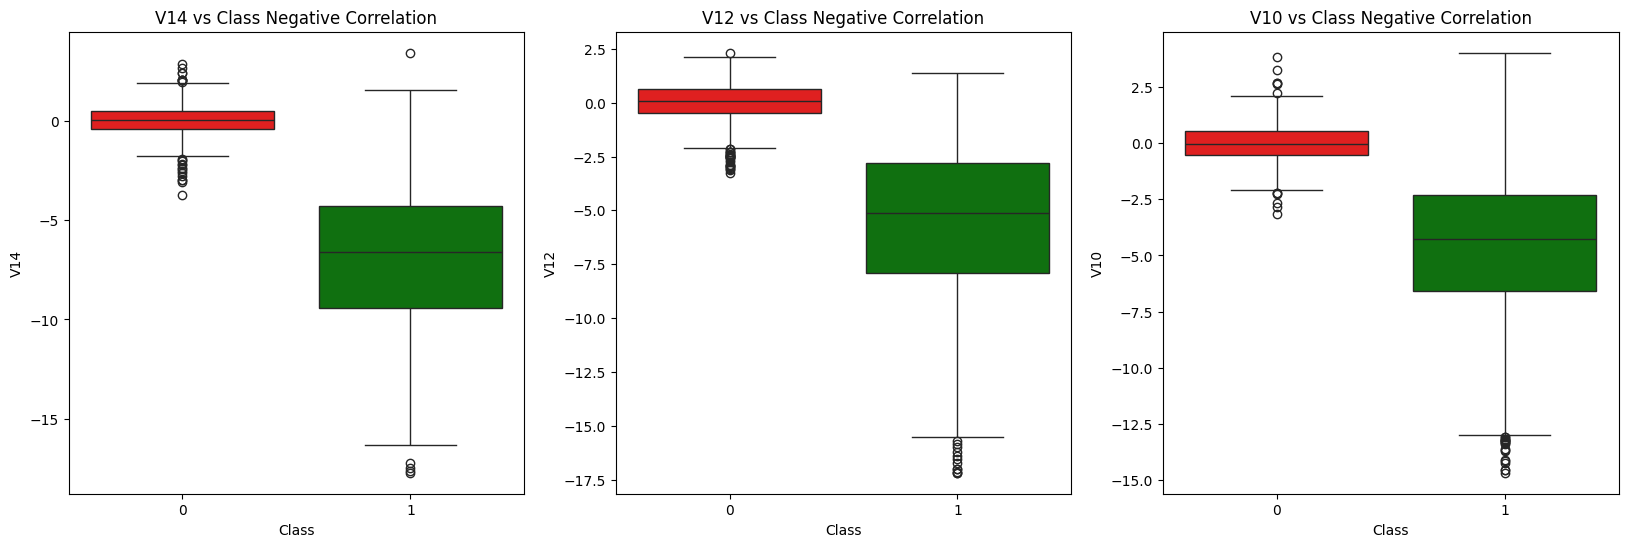

In [24]:
#Checking Features V14,V12,V10 after dropping outliers
fig,axes = plt.subplots(ncols=3,figsize=(20,6))

sns.boxplot(x='Class',y='V14',data=new_df,palette=colors,ax=axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,palette=colors,ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,palette=colors,ax=axes[2])
axes[2].set_title('V10 vs Class Negative Correlation')

plt.show()